# Problems and Solutions 

Exercies from books and exams. Good tests!

Will be basis for Student (& Prof) Vignette. 

## Provenance

* Oct 2022 created new.

In [1]:
from aggregate import build
from aggregate import Distortion, make_mosaic_figure, Aggregate, Portfolio

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 1.56 s (started: 2022-10-30 22:04:47 +00:00)


# Exercises from LDA (Frees Book) 

In [ ]:
ex_3_3_5 = build('agg AEQ 1 claim sev [200 200] * [expon pareto] [1 3] wts [.25 .75] + [0 -200] fixed',
             normalize=False)
    # , discretization_calc='both', log2=16)
                 # sev_calc='continuous')
                 # log2=16, bs=1/64) # , sev_calc='continuous')
self = ex_3_3_5
1/ex_3_3_5.bs

In [ ]:
ex_3_3_5

In [ ]:
f, f2 = ex_3_3_5.sev_cdf(100, True)
f, .25*(1-np.exp(-(100/(100 + 100)))) + .75*(1 - (200/(100+200))**3), ex_3_3_5.cdf(100), ex_3_3_5.sev_cdf(100+ex_3_3_5.bs/2)

In [ ]:
from aggregate import build
import aggregate as agg

In [ ]:
build('agg AEQ2 1 claim inf xs 200 sev lognorm 200 cv .3  fixed') #, bs=1/16)

In [ ]:
ex_3_4_1 = build('agg AEQ2 1 claim inf xs 100 sev 1000 * expon 1 ! fixed') # , bs=1/16)
# ex_3_4_1 = build('agg AEQ2 1 claim sev 1000 @ expon 1 occurrence net of 100 x 0 fixed', log2=16)
self = ex_3_4_1

In [ ]:
self

In [ ]:
1000 * np.exp(-0.1) , (1000 * np.exp(-0.1) * 1.1)**2

In [ ]:
%%sf 1 1 
self.density_df.F.plot(ax=ax)
ax.set(ylim=[-0.05, 1.05])
ax.grid(lw=.25, c='w')

In [ ]:
ex_3_4_2 = build('agg AEQ2 1 claim sev 10 * beta 2 1 occurrence net of 4 x 0 fixed')
self = ex_3_4_2
self

In [ ]:
ex_3_4_2 = build('agg AEQ2 1 claim 6 x 4 sev 10 * beta 2 1 fixed')
self = ex_3_4_2
self

In [ ]:
ex_3_4_2 = build('agg AEQ2 1 claim 6 x 4 sev 10 * beta 2 1 ! fixed')
self = ex_3_4_2
self

In [ ]:
%%sf 1 1 
self.density_df.F.plot(ax=ax)
ax.set(ylim=[-0.05, 1.05])
ax.grid(lw=.25, c='w')

In [ ]:
xs = np.linspace(0, 4, 2**13, endpoint=False)
F = np.where(xs<3,(xs * xs  * (2 - xs / 3)) / 9, 1)
ps = np.diff(F, append=1)
plt.plot(xs, ps)

In [ ]:
ex_3_4_4 = Aggregate('Example', exp_en=1, sev_name='dhistogram', sev_xs=xs, sev_ps=ps, 
                 exp_attachment=0, exp_limit=1, freq_name='fixed')
self = ex_3_4_4
self

In [ ]:
ex3_4_5_06 = build('agg X06 1 claim 500 x 100 sev 1000 * expon fixed')
ex3_4_5_07 = build('agg X07 1 claim 500 x 100 sev 1050 * expon fixed')
ans = pd.concat((ex3_4_5_06.describe, ex3_4_5_07.describe), keys=['2006', '2007'])
display(ans)
ans.iloc[3, 0] / ans.iloc[0, 0] - 1

In [ ]:
ans = build.write('agg Copart 1 claim sev 3600 * pareto 5 -3600 fixed')

In [ ]:
list(ans.keys())

In [ ]:
ans[('agg', 'Copart')].object

In [ ]:
build('agg Copart 1 claim 5000 xs 0 sev 3600 * pareto 5 - 3600 occurrence net of 0.15 so 5000 xs 0 fixed', log2=16)

In [ ]:
# their cv
987.6108 / 741.5103

In [ ]:
from aggregate import build

In [ ]:
ob = build('agg Copart 1 claim sev 3600*pareto 5 - 3600 occurrence net of 0.15 so 1e7 xs 0 fixed', log2=18, bs=1/4)
ob

In [ ]:
ex3_4_4 = build('agg Copart 1 claim sev 3600 * pareto 5 - 3600 occurrence net of 0.15 so 5000 xs 0 and 1e20 xs 5000 fixed')
self = ex3_4_4

In [ ]:
self

In [ ]:
741.5103 * .85

In [ ]:
self.density_df.F.plot()

# Agg Loss Models, Ch 5

In [ ]:
ex_5_3_1 = build('agg QU 12 claims dsev [1 2 3] [1/2 1/3 1/6] poisson')
ex_5_3_1

In [ ]:
ex_5_3_1.agg_m, ex_5_3_1.agg_var

In [ ]:
ex_5_3_2 = build('agg QU2 dfreq [1 2] [.8 .2] dsev [0 100 1000] [.2 .7 .1]')
ex_5_3_2

In [ ]:
ex_5_3_2.agg_m, ex_5_3_2.agg_sd, ex_5_3_2.agg_var 

In [ ]:
ex_5_3_3 = build('agg QU3 4 claims dsev [1:4] geometric')  
ex_5_3_3

In [ ]:
ex_5_3_3.cdf(3)

In [ ]:
ex_5_3_3.density_df.F[:20]

In [ ]:
from aggregate import MomentAggregator
import scipy.stats as ss

In [ ]:
ex_5_3_5 = build('agg Pharma 25 claims sev 90 * uniform 1 + 5 poisson')

In [ ]:
ex_5_3_5.sf(2000), ex_5_3_5.agg_m, ex_5_3_5.agg_var

In [ ]:
import scipy.stats as ss

In [ ]:
m, sd =  ex_5_3_5.agg_m, ex_5_3_5.agg_var**.5
fz = ss.norm(loc=m, scale=sd)

In [ ]:
mom = MomentAggregator.agg_from_fs2(8, 9, 10000, 3937**2)
fz = ss.norm(loc=mom.ex, scale=mom.sd)
mom['prob'] = fz.sf(1.5*m)
mom

In [ ]:
ax = (ex_5_3_5.density_df.p / ex_5_3_5.bs).plot(label='Exact')
ax.plot(ex_5_3_5.xs, fz.pdf(ex_5_3_5.xs), label='Normal approx')
ax.grid(lw=.25, c='w')
ax.set(xlim=[0, 3000], title='Normal approximation')
ax.legend(loc='upper right')

In [ ]:
ex_5_3_6a = build('agg Projects 2 claims dsev [5 10 20] [.2 .3 .5] geometric')
ex_5_3_6a

In [ ]:
# geometric, mean=beta, p=1/(1+beta), var=b(1+b)
np.sqrt(2*3) / 2

In [ ]:
ex_5_3_6b = build('agg Projects 2 claims dsev [5 10 20] [.2 .3 .5] geometric aggregate net of 15 x 0')
ex_5_3_6b

In [ ]:
ex_5_3_6c = build('agg Projects 2 claims dsev [5 10 20] [.2 .3 .5] geometric aggregate net of 5 x 0')
ex_5_3_6d = build('agg Projects 2 claims dsev [5 10 20] [.2 .3 .5] geometric aggregate net of 10 x 0')
display(ex_5_3_6c)
ex_5_3_6d

In [ ]:
# var(NB) = n (1+cn), c = (v/n-1)/n, cv=c*c
c = (8/3-1)/300
cv = c**.5
c, cv

In [ ]:
# unconditional doesn't work with dsev?
# ex_5_5_5 = build(f'agg Projects 300 claims inf xs 10 dsev [4*1.5 8*1.5 12*1.5 20*1.5] ! mixed gamma {cv}')
ex_5_5_5 = build(f'agg Projects 300 claims inf xs 10 sev dhistogram xps [{4*1.5} {8*1.5} {12*1.5} {20*1.5}] ! mixed gamma {cv}')
ex_5_5_5

In [ ]:
np.sqrt(800)/ 300

In [ ]:
ex_5_5_5.agg_var

In [ ]:
cv

In [ ]:
ex_5_5_7 = build(f'agg Auto {20 * 0.8} claims inf xs 100 sev 200 * expon ! poisson')
ex_5_5_7

## Aggregate loss guided tutorials

https://www.ssc.wisc.edu/~jfrees/loss-data-analytics/aggregate-loss-guided-tutorials/

In [ ]:
soa113 = build('agg SOA113 dfreq [0 2 3] [.7 .2 .1] dsev [0, 10] [.8 .2]')
soa113

In [ ]:
soa113.sf(soa113.agg_m + 2 * soa113.agg_sd)

In [ ]:
soa99 = build('agg SOA99 2 claims dsev [1 2 3] poisson aggregate net of 2 x 0')
soa99

In [ ]:
soa212 = build('agg SOA212 10 claims 6 x 4 sev 10 * uniform ! poisson')
soa212

In [ ]:
soa212.agg_var

# web trawling
https://web.ma.utexas.edu/users/mcudina/m339j-sample-three-probs.pdf

Problem 3.5. (10 points) The frequency random variable N is assumed to have a Poisson distribution
with a mean of 2. Individual claim severity random variable X has the following probability mass
function
pX(100) = 0.6, pX(200) = 0.3, pX(300) = 0.1.
Let the above be the common distribution of the i.i.d. severity random variables {Xj ; j = 1, 2, . . . },
and Let our usual assumptions hold, i.e., let N be independent of {Xj ; j = 1, 2, . . . }. Define the
aggregate loss as S =
PN
j=1 Xj . Calculate the probability that S is exactly equal to 300.

In [ ]:
web = build('agg Web 2 claims dsev [100 200 300] [.6 .3 .1] poisson')
web

In [ ]:
web.pmf(300)

Problem 3.6. (6 points) In the compound model for aggregate claims, let the frequency random
variable N have the probability (mass) function
pN (0) = 0.4, pN (1) = 0.3, pN (2) = 0.2, pN (4) = 0.1.
Moreover, let the common distribution of the i.i.d. severity random variables {Xj ; j = 1, 2, . . . } be
given by the probability (mass) function pX(1) = 0.3 and pX(2) = 0.7.
Let our usual assumptions hold, i.e., let N be independent of {Xj ; j = 1, 2, . . . }.
Define the aggregate loss as S =
PN
j=1 Xj .
Calculate E[(S − 2)+].


In [ ]:
web2 = build('agg Web2 dfreq [0 1 2 4] [.4 .3 .2 .1] dsev [1 2] [.3 .7] aggregate net of 2 x 0')
web2

# KPW: Loss Models, Fifth Edition

An insurable event has a 10% probability of occurring and when it occurs results in
a loss of 5,000. Market research has indicated that consumers will pay at most 550
to purchase insurance against this event. How many policies must a company sell in
order to have a 95% chance of making money (ignoring expenses)?

In [ ]:
from aggregate import MomentAggregator, MomentWrangler

In [ ]:
ma = MomentAggregator()

In [ ]:
MomentAggregator.agg_from_fs2(100, 300, 10, 16)

In [ ]:
type(_)

In [ ]:
b = build('agg FreqBinomial 2 claims dsev [1] binomial 0.25')
b

In [ ]:
import scipy.stats as ss
fz = ss.binom(8, 0.25)
[fz.pmf(i) for i in range(9)]

In [ ]:
b.density_df.query('p > 0').p

In [ ]:
from aggregate import build

In [ ]:
for n in range(2430, 2440):
    kpw91 = build(f'agg KPW9.1 {n * 0.1} claims dsev [5] [.3 .7] binomial 0.1', update=False)
    fz = kpw91.fit('norm')
    z = fz.cdf(n*.55)
    print(n, z)
    if z >= 0.95:
        break
# kpw91.update(approximation='exact', log2=18, bs=1)

In [ ]:
kpw91.update(log2=17, approximation='exact')

In [ ]:
kpw91.bs, kpw91.cdf(n*0.55)

In [ ]:
fz.stats()

In [ ]:
n = 2435.42
(.11 * n - 0.1 *n) / np.sqrt(0.1*0.9*n)

## KWP 9.3, 9.4

In [ ]:
moms = MomentAggregator.agg_from_fs2(6.7, 2.3**2, 179247, 52141**2)
moms

In [ ]:
fzn = ss.norm(loc=moms.ex, scale=moms.sd)
sigma = np.sqrt(np.log(moms.cv**2 + 1))
fzl = ss.lognorm(sigma, scale=moms.ex*np.exp(-sigma**2/2))
fzn.stats(), fzl.stats(), fzn.sf(1.4 * moms.ex), fzl.sf(1.4 * moms.ex)

In [ ]:
sigma

## Example KPW 9.5, 9.6

Noote: units of 25

In [ ]:
from aggregate import build

In [ ]:
kpw95 = build('agg KPW.95 dfreq  [0:8] [0.05, 0.1, 0.15, 0.2, 0.25, 0.15, 0.06, 0.03, 0.01]'
              'dsev [1:10] [0.15, 0.2, 0.25, 0.125, 0.075, 0.05, 0.05, 0.05, 0.025, 0.025]')
kpw95

In [ ]:
kpw95.agg_m, kpw95.agg_var

In [ ]:
p = kpw95.density_df.query('p > 0')[['p', 'S']]
p.head()

In [ ]:
kpw95.agg_m, kpw95.agg_var

In [ ]:
(p.S[::-1].cumsum()[::-1] * 25)[:8]

## Example 9.9, 9.10

In [ ]:
from aggregate import build
from aggregate import Aggregate

In [ ]:
od = build.interpret_program('''
port Ex9.9
    agg A 2 claims dsev [1 2] [.6 .4] poisson
    agg B 1 claims dsev [1 3] [.7 .3] poisson
''')

In [ ]:
od[0].list()

In [ ]:
od[0].spec

In [ ]:
from aggregate import build

In [ ]:
from aggregate import Portfolio

In [ ]:
from numpy import array

In [ ]:
p = Portfolio('test', [{'name': 'A', 'exp_en': 2.0, 'sev_name': 'dhistogram', 'sev_xs': array([         1,          2]), 'sev_ps': array([       0.6,        0.4]), 'freq_name': 'poisson', 'note': ''}, {'name': 'B', 'exp_en': 1.0, 'sev_name': 'dhistogram', 'sev_xs': array([         1,          3]), 'sev_ps': array([       0.7,        0.3]), 'freq_name': 'poisson', 'note': ''}])

In [17]:
a = build("""
agg logo1 0.05 claim [10, 22.632, 35.263, 47.895, 60.526, 73.158, 85.789, 98.421, 111.05, 123.68, 136.32, 148.95, 161.58, 174.21, 186.84, 199.47, 212.11, 224.74, 237.37, 250] xs 0 sev lognorm 100 cv 1 fixed
agg logo2    1 claim [10, 22.632, 35.263, 47.895, 60.526, 73.158, 85.789, 98.421, 111.05, 123.68, 136.32, 148.95, 161.58, 174.21, 186.84, 199.47, 212.11, 224.74, 237.37, 250] xs 0 sev lognorm 100 cv 1 fixed
""")
a

49:24.448|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8325546111576977 shape from sev_cv 1.0
49:24.542|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8325546111576977 shape from sev_cv 1.0
49:24.629|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8325546111576977 shape from sev_cv 1.0



agg logo1 0.05 claim [10, 22.632, 35.263, 47.895, 60.526, 73.158, 85.789, 98.421, 111.05, 123.68, 136.32, 148.95, 161.58, 174.21, 186.84, 199.47, 212.11, 224.74, 237.37, 250] xs 0 sev lognorm 100 cv 1 fixed
agg logo2    1 claim [10, 22.632, 35.263, 47.895, 60.526, 73.158, 85.789, 98.421, 111.05, 123.68, 136.32, 148.95, 161.58, 174.21, 186.84, 199.47, 212.11, 224.74, 237.37, 250] xs 0 sev lognorm 100 cv 1 fixed



49:24.726|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8325546111576977 shape from sev_cv 1.0
49:24.808|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8325546111576977 shape from sev_cv 1.0
49:24.888|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8325546111576977 shape from sev_cv 1.0
49:24.963|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8325546111576977 shape from sev_cv 1.0
49:25.040|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8325546111576977 shape from sev_cv 1.0
49:25.111|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8325546111576977 shape from sev_cv 1.0
49:25.177|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8325546111576977 shape from sev_cv 1.0
49:25.253|2794|Level 31  | aggregate.distributions, __init__|  sev_a 

[                                                                                    Type
 Item                                                                                    
 kind                                                                                 agg
 name                                                                               logo1
 spec                                                                      <class 'dict'>
 program  agg logo1 0.05 claim  [10, 22.632, 35.263, 47.895, 60.526, 73.158, 85.789, 9...
 object                                       <class 'aggregate.distributions.Aggregate'>,
                                                                                     Type
 Item                                                                                    
 kind                                                                                 agg
 name                                                                               logo2
 spec    

time: 3.11 s (started: 2022-10-25 13:49:24 +01:00)


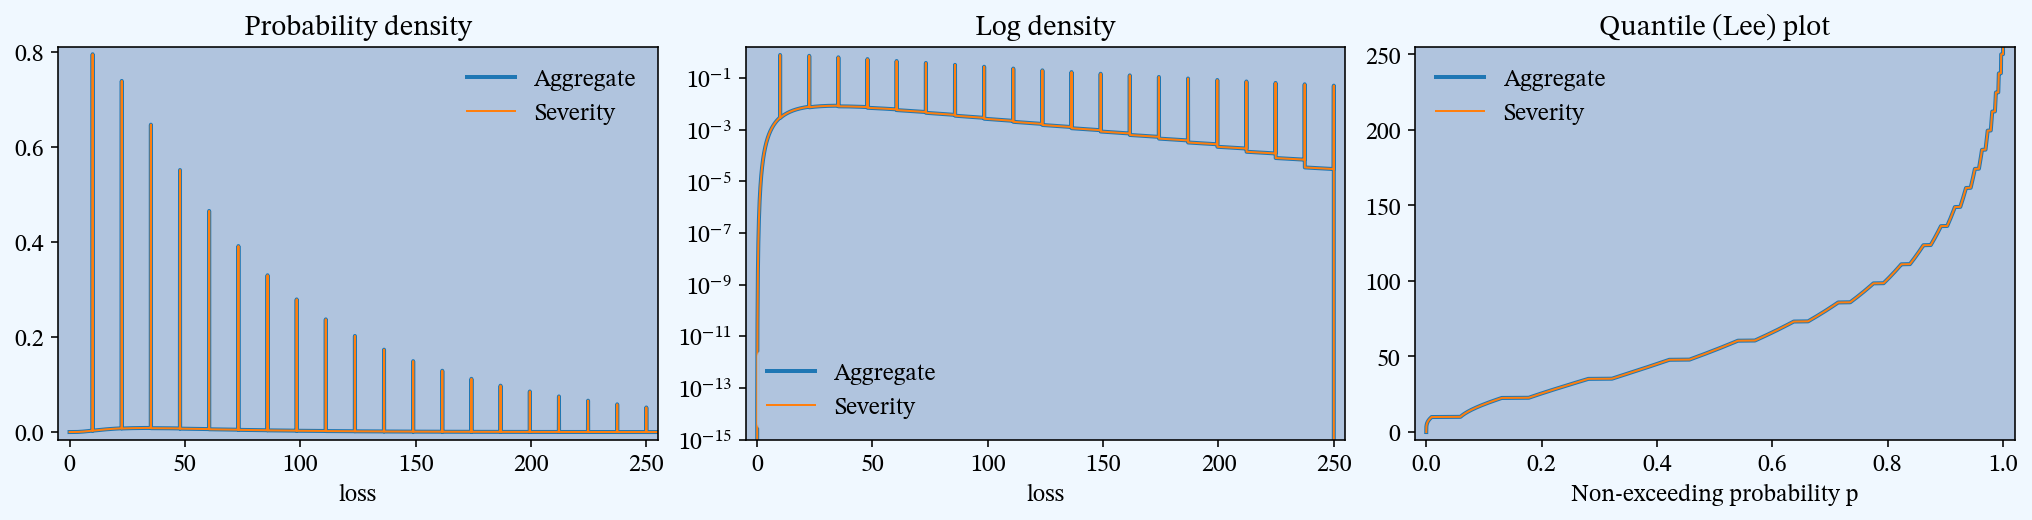

time: 1.25 s (started: 2022-10-25 13:49:52 +01:00)


In [ ]:
a[0].object.plot()

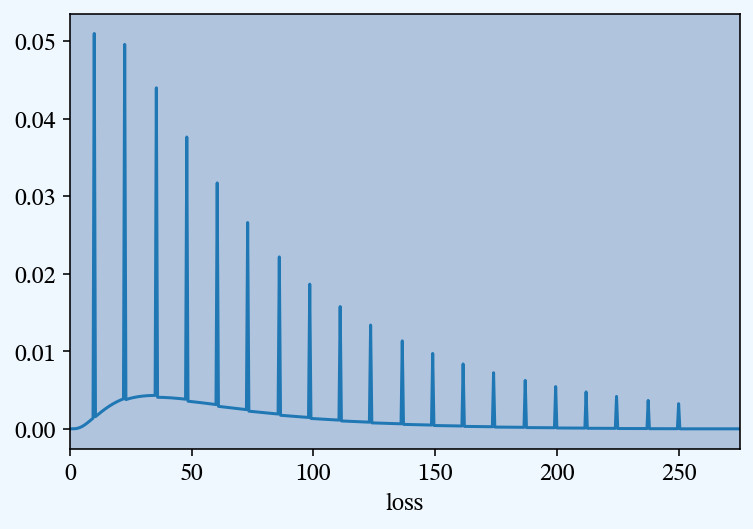

time: 125 ms (started: 2022-10-25 13:53:07 +01:00)


In [34]:
ax = a[1].object.density_df.p_sev.plot()
ax.set(xlim=[0, 275]);

In [ ]:
port = build('''
port Ex9.9
    agg A 2 claims dsev [1 2] [.6 .4] poisson
    agg B 1 claims dsev [1 3] [.7 .3] poisson
''', bs=1, log_level=26)
port

In [ ]:
port.pmf(2)

In [ ]:
np.exp(-3)

In [ ]:
port.density_df.loc[:10, ['p_total']]  / np.exp(-3)

# Exerc 9.40

In [ ]:
from aggregate import build

In [ ]:
port0940 = build('''

port Ex9.40
    agg A 50 claims dsev [10] poisson
    agg B 60 claims dsev [20] poisson
    agg C 30 claims dsev [40] poisson
    
''')

port0940

In [ ]:
port0940.agg_m, port0940.agg_sd,port0940.agg_var , port0940.agg_skew

In [ ]:
port0940.density_df.F.plot()

# Bahnemann Chapter 6: Limits and Deductibles 

In [ ]:
## Example 4.1

In [ ]:
a = build('agg Ex.4.1 dfreq[0 1 2][.6 .3 .1] dsev[1 2 3][.4 .5 .1]')
a

In [ ]:
a.agg_m, a.agg_var

In [ ]:
a.density_df.query('p_total > 0') [['p_total', 'F']]

## Example 4.2

In [ ]:
from aggregate import build

In [ ]:
a = build('agg Ex.4.2 2.5 claims sev 4 * gamma 3 poisson', log2=16)
a

In [ ]:
a.agg_m, a.agg_var

In [ ]:
a.density_df.loc[sorted(np.hstack((5, np.arange(0, 100.5, 10)))), 
                        ['F']].style.format(lambda x: f'{x:.4g}')

## Bahnemann Example 6.3

![Picture](img/Bahnemann_6_3.png) 

In [11]:
from aggregate import build
f3 = lambda x: f'{x:.3f}'
f4 = lambda x: f'{x:.4f}'
g3 = lambda x: f'{x:.3g}'
fc1 = lambda x: f'{x:,.1f}'
fc0 = lambda x: f'{x:,.0f}'
import scipy.stats as ss

time: 0 ns (started: 2022-10-30 07:49:51 +00:00)


In [ ]:
def qd(df, caption=''):
    f3 = lambda x: f'{x:.3f}'
    f4 = lambda x: f'{x:.4f}'
    g3 = lambda x: f'{x:.3g}'
    fc1 = lambda x: f'{x:,.1f}'
    fc0 = lambda x: f'{x:,.0f}'
    mns = df.mean()
    ans = {}
    for c, mn in zip(df, mns): 
        ans[c] = f4 if mn < 10 else fc0
    if caption == '': 
        display(df.style.format(ans))
    else:
        display(df.style.format(ans).set_caption(caption))
        

In [2]:
# need up to 5M and need a reasonably small bs, say 50
# hence neeed log2 ge
np.ceil(np.log(5e6 / 50) / np.log(2))

17.0

time: 0 ns (started: 2022-10-30 07:43:48 +00:00)


In [3]:
# actual mean
np.exp(7+2.4**2/2), np.exp(7)

(19535.722662065487, 1096.6331584284585)

time: 0 ns (started: 2022-10-30 07:43:48 +00:00)


In [4]:
a = build('agg B.Ex.6.3 1 claim '
          'sev exp(7) * lognorm 2.4 '
          'fixed', bs=50, log2=17, 
          # Normalize=false is critical to getting the right accuracy
          # you can see this will be an issue because you won't get 
          # to the "end" of the distribution 
          normalize=False, 
         )
a

line 3108|WARNING   | aggregate.distributions.safe_integrate|  Severity.moms | ansr=inf, message no message ->
line 3113|WARNING   | aggregate.distributions.safe_integrate|  Severity.moms | splitting lognorm EX^2 integral for convergence reasons
line 3119|WARNING   | aggregate.distributions.safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^2 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.
line 3108|WARNING   | aggregate.distributions.safe_integrate|  Severity.moms | ansr=8.568964911078015e+18, message no message ->
line 3113|WARNING   | aggregate.distributions.safe_integrate|  Severi

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,19.536k,17.374k,-110.655m,17.785,6.855,-614.540m,4.820k
Freq,1.000,,,0.000,,,
Agg,19.536k,17.374k,-110.655m,17.785,6.855,-614.540m,4.820k


time: 1.41 s (started: 2022-10-30 07:43:48 +00:00)


In [6]:
# survival
a.density_df.loc[[1e5,  5e5, 7.5e5, 1e6, 2e6, 3e6, 4e6, 5e6], ['F', 'S', 'lev']].style.format({'F': f3, 'S': g3, 'lev': fc1})

,F,S,lev,lev
loss,,,,
100000.0,0.970,0.03,"8,895.8","8,895.8"
500000.0,0.995,0.00537,"13,625.3","13,625.3"
750000.0,0.997,0.00326,"14,667.7","14,667.7"
1000000.0,0.998,0.00226,"15,344.9","15,344.9"
2000000.0,0.999,0.000878,"16,737.6","16,737.6"
3000000.0,1.000,0.000488,"17,389.9","17,389.9"
4000000.0,1.000,0.000316,"17,782.0","17,782.0"
5000000.0,1.000,0.000224,"18,047.7","18,047.7"


time: 16 ms (started: 2022-10-30 07:44:54 +00:00)


In [13]:
alae = ε = 2200
ϕ = 0.0005
ve = 0.35

time: 0 ns (started: 2022-10-30 07:50:09 +00:00)


In [99]:
# survival
rows = [1e5,  5e5, 7.5e5, 1e6, 2e6, 3e6, 4e6, 5e6]
bit = a.density_df.loc[rows, ['lev']]
bit['Fixed ALAE'] = (bit.lev + alae) / (bit.lev.iloc[0] + alae)
bit['Prop ALAE'] = bit.lev / bit.lev.iloc[0]
qd(bit.reset_index(drop=False), 'Table 6.1: Increased limits factors')

,loss,lev,Fixed ALAE,Prop ALAE
0,"100,000","8,896",1.0000,1.0000
1,"500,000","13,625",1.4262,1.5317
2,"750,000","14,668",1.5202,1.6488
3,"1,000,000","15,345",1.5812,1.7250
4,"2,000,000","16,738",1.7067,1.8815
5,"3,000,000","17,390",1.7655,1.9549
6,"4,000,000","17,782",1.8009,1.9989
7,"5,000,000","18,048",1.8248,2.0288


time: 15 ms (started: 2022-10-30 08:40:53 +00:00)


In [79]:
# exposure
m = 400
prem_bl = m * ϕ * (bit.loc[100000, 'lev'] + alae) / (1 - ve)
prem_bl

3414.0775234148923

time: 0 ns (started: 2022-10-30 08:30:21 +00:00)


## Bahnemann Example 6.4

In [55]:
bit['Premium'] = m * ϕ * (bit['lev'] + alae) / (1 - ve)
# bit = bit.drop([500000, 750000])
bit['Layer Premium'] = np.diff(bit.Premium, prepend=0)
qd(bit.reset_index(drop=False), 'Table 6.2')

,loss,lev,Fixed ALAE,Prop ALAE,Premium,Layer Premium
0,"100,000","8,896",1.0000,1.0000,"3,414","3,414"
1,"500,000","13,625",1.4262,1.5317,"4,869","1,455"
2,"750,000","14,668",1.5202,1.6488,"5,190",321
3,"1,000,000","15,345",1.5812,1.7250,"5,398",208
4,"2,000,000","16,738",1.7067,1.8815,"5,827",429
5,"3,000,000","17,390",1.7655,1.9549,"6,028",201
6,"4,000,000","17,782",1.8009,1.9989,"6,148",121
7,"5,000,000","18,048",1.8248,2.0288,"6,230",82


time: 0 ns (started: 2022-10-30 08:04:22 +00:00)


In [ ]:
bl = build('agg Basic 0.2 claims 100000 x 0 sev lognorm 

In [59]:
1/1.2

0.8333333333333334

time: 0 ns (started: 2022-10-30 08:10:27 +00:00)


In [58]:
# ALAE factor
u = 1.2

time: 0 ns (started: 2022-10-30 08:10:18 +00:00)


In [82]:
bl = build('agg B.Basic 0.2 claims '
           '100000 xs 0 '
          'sev exp(7) * lognorm 2.4 '
          'poisson', bs=50, log2=17, 
          normalize=False, 
         )

b1m = build('agg B.Basic 0.2 claims '
           '1000000 xs 0 '
          'sev exp(7) * lognorm 2.4 '
          'poisson', bs=50, log2=17, 
          normalize=False, 
         )

time: 281 ms (started: 2022-10-30 08:31:09 +00:00)


In [61]:
bl.describe

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,8.896k,8.896k,-32.838u,2.340,2.340,39.073u,3.342
Freq,200.000m,,,2.236,,,2.236
Agg,1.779k,1.779k,-32.838u,5.690,5.691,33.040u,8.175


time: 16 ms (started: 2022-10-30 08:12:25 +00:00)


In [81]:
k_prime = 0.0277
k = k_prime * np.sqrt(m * ϕ)
ex, cvx = bl.describe.loc['Sev', ['E(X)', 'CV(X)']]
vx = (cvx * ex) **2
ex2 = vx + ex**2
ex, cvx, ex2, k_prime * np.sqrt(ex2), k * bl.describe.loc['Agg', 'CV(X)'] * ex

(8896.044076007398,
 2.34008818817231,
 512509058.23222876,
 627.0909625333527,
 627.0909625333527)

time: 15 ms (started: 2022-10-30 08:30:38 +00:00)


In [83]:
ex, cvx = b1m.describe.loc['Sev', ['E(X)', 'CV(X)']]
vx = (cvx * ex) **2
ex2 = vx + ex**2
ex, cvx, ex2, k_prime * np.sqrt(ex2), k * b1m.describe.loc['Agg', 'CV(X)'] * ex

(15345.224869776124,
 4.629966538380874,
 5283276847.856447,
 2013.4064399896442,
 2013.4064399896442)

time: 16 ms (started: 2022-10-30 08:31:31 +00:00)


In [108]:
b10m = build(f'agg B.Basic.All {m * ϕ} claims '
           '10000000 xs 0 '
          'sev exp(7) * lognorm 2.4 '
          'poisson', bs=50, log2=18, 
          normalize=False, 
         )
b1m

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,18.682k,18.681k,-15.639u,8.648,8.648,15.852u,35.847
Freq,200.000m,,,2.236,,,2.236
Agg,3.736k,3.736k,-22.170u,19.466,19.466,-13.574u,79.340


time: 297 ms (started: 2022-10-30 08:43:29 +00:00)


In [113]:
df = b10m.density_df[['loss', 'p_sev', 'S_sev', 'lev', 'exlea']]
# severity lev
df['ex_lt'] = (df.loss * df.p_sev).cumsum()
df['sev_lev'] = df.ex_lt + df.S_sev * df.loss
# sev lev squared
df['ex2_lt'] = (df.loss ** 2 * df.p_sev).cumsum()
df['ex2'] = df.ex2_lt + df.S_sev * df.loss ** 2
df['rho'] = df.ex2 ** 0.5 * k_prime

,loss,p_sev,S_sev,lev,exlea,ex_lt,sev_lev,ex2_lt,ex2,rho
loss,,,,,,,,,,
100000,100000.000000,0.000014,0.030021,1769.164521,1170.552088,5893.683946,8895.751951,212302463.547736,512509264.083089,627.091088
1000000,1000000.000000,0.000000,0.002257,3067.516245,2615.633589,13087.887264,15344.932715,3026231603.002644,5283277054.196095,2013.406479


time: 47 ms (started: 2022-10-30 08:45:22 +00:00)


In [116]:
rows = [100000.0, 500000.0, 1000000.0, 2000000.0, 3000000.0, 4000000.0, 5000000.0]

time: 0 ns (started: 2022-10-30 08:46:35 +00:00)


In [118]:
df['LLAE'] = df.sev_lev * u
df['I wo'] = df.sev_lev / df.loc[100000, 'sev_lev']
df['I with'] = (df.LLAE + df.rho) / (df.LLAE[100000] + df.rho[100000])
qd(df.loc[rows, ['loss', 'LLAE', 'rho', 'I wo', 'I with']].reset_index(drop=True), 'Table 6.3')

,loss,LLAE,rho,I wo,I with
0,"100,000","10,675",627,1.0000,1.0000
1,"500,000","16,350","1,473",1.5317,1.5770
2,"1,000,000","18,414","2,013",1.7250,1.8074
3,"2,000,000","20,085","2,663",1.8815,2.0128
4,"3,000,000","20,868","3,090",1.9549,2.1198
5,"4,000,000","21,338","3,410",1.9989,2.1898
6,"5,000,000","21,657","3,668",2.0288,2.2408


time: 15 ms (started: 2022-10-30 08:47:06 +00:00)


In [119]:
np.sqrt(0.1)

0.31622776601683794

time: 0 ns (started: 2022-10-30 08:48:23 +00:00)


In [150]:
bagg500 = build(f'agg B.Basic.All 1.2 claims '
           '500000 xs 0 '
          'sev exp(7.6) * lognorm 2.4 '
          f'mixed gamma {np.sqrt(0.1)}', bs=50, log2=18, 
          normalize=False, 
         )
bagg2m = build(f'agg B.Basic.2M 1.2 claims '
                '2000000 xs 0 '
                'sev exp(7.6) * lognorm 2.4 '
               f'mixed gamma {np.sqrt(0.1)} ', 
                bs=50, log2=18, 
                normalize=False, 
         )
bagg2m3a = build(f'agg B.Basic.2M 1.2 claims '
                '2000000 xs 0 '
                'sev exp(7.6) * lognorm 2.4 '
               f'mixed gamma {np.sqrt(0.1)} aggregate ceded to {3000000} xs 0', 
                bs=50, log2=18, 
                normalize=False, 
         )

time: 641 ms (started: 2022-10-30 12:53:20 +00:00)


In [151]:
bagg500

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,21.743k,21.742k,-7.582u,3.155,3.155,8.366u,5.311
Freq,1.200,,,966.092m,,,1.070
Agg,26.091k,26.091k,-7.582u,3.038,3.038,7.520u,4.994


time: 15 ms (started: 2022-10-30 12:53:21 +00:00)


In [152]:
bagg2m

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,28.338k,28.338k,-5.817u,4.758,4.758,6.080u,10.437
Freq,1.200,,,966.092m,,,1.070
Agg,34.006k,34.006k,-5.817u,4.450,4.450,5.794u,9.473


time: 15 ms (started: 2022-10-30 12:53:21 +00:00)


In [154]:
bagg2m3a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,28.338k,28.338k,-5.817u,4.758,4.758,6.080u,10.437
Freq,1.200,,,966.092m,,,1.070
Agg,34.006k,33.998k,-226.725u,4.450,4.446,-878.623u,9.473


time: 16 ms (started: 2022-10-30 12:53:27 +00:00)


In [164]:
bagg2m.agg_sd,bagg2m.agg_var, bagg2m.agg_skew

(151311.47469045265, 22895162372.999493, 9.472767880156624)

time: 0 ns (started: 2022-10-30 12:55:54 +00:00)


In [157]:
fz = bagg2m.approximate('sgamma')

time: 0 ns (started: 2022-10-30 12:54:16 +00:00)


In [161]:
from scipy.integrate import quad

time: 0 ns (started: 2022-10-30 12:55:11 +00:00)


In [163]:
fz.stats('mvs')

(array(     34006), array( 2.2895e+10), array(    9.4728))

time: 0 ns (started: 2022-10-30 12:55:46 +00:00)


In [162]:
quad(fz.sf, 3e6, np.inf)

(-0.00014859978745972706, 6.1749242466502e-09)

time: 31 ms (started: 2022-10-30 12:55:33 +00:00)


In [172]:
quad(fz.sf, 3e6, 50e6)

(91.22595304620786, 3.1164055696924695e-09)

time: 16 ms (started: 2022-10-30 15:27:02 +00:00)


In [168]:
quad(lambda x : (x-3e6) * fz.pdf(x), 3e6, np.inf)

(90.6439456541391, 101.94312966863103)

time: 62 ms (started: 2022-10-30 12:58:09 +00:00)


In [166]:
fz.sf(3e6), bagg2m.sf(3.e6), fz.sf(3e6) - bagg2m.sf(3.e6)

(0.00014859891126457967, 1.4497695447590608e-05, 0.00013410121581698906)

time: 0 ns (started: 2022-10-30 12:57:01 +00:00)


In [179]:
bagg2m.density_df.loc[3e6, 'S'] - fz.sf(3e6), \
bagg2m.density_df.loc[3e6, 'F'] - fz.cdf(3e6)

(-0.00013410121579787276, 0.0001341012158170285)

time: 0 ns (started: 2022-10-30 15:31:26 +00:00)


In [178]:
(bagg2m.density_df.loc[3e6:, 'S'].sum() * bagg2m.bs * 100

751.2214936698388

time: 0 ns (started: 2022-10-30 15:31:02 +00:00)


In [153]:
bagg2m.describe#.iloc[-1, :2].diff()

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,28.338k,28.338k,-5.817u,4.758,4.758,6.080u,10.437
Freq,1.200,,,966.092m,,,1.070
Agg,34.006k,34.006k,-5.817u,4.450,4.450,5.794u,9.473


time: 16 ms (started: 2022-10-30 12:53:22 +00:00)


In [193]:
df = bagg2m.density_df.filter(regex='loss|^p$|F|S|lev')
df['sg'] = fz.cdf(df.loss)
df['pdf'] = fz.pdf(df.loss)
df

,loss,p,F,F_sev,S,S_sev,lev,sg,pdf
loss,,,,,,,,,
0.000,0.000,333.928m,333.928m,33.965m,666.072m,966.035m,0.000,0.000,0.000
50.000,50.000,18.578m,352.506m,85.701m,647.494m,914.299m,33.304,0.000,0.000
100.000,100.000,14.347m,366.853m,124.072m,633.147m,875.928m,65.678,0.000,0.000
150.000,150.000,12.009m,378.862m,155.131m,621.138m,844.869m,97.336,0.000,0.000
200.000,200.000,10.464m,389.326m,181.422m,610.674m,818.578m,128.393,0.000,0.000
...,...,...,...,...,...,...,...,...,...
13.107M,13.107M,0.000,1000.000m,1000.000m,558.664f,333.067a,34.006k,1000.000m,45.392a
13.107M,13.107M,0.000,1000.000m,1000.000m,558.664f,333.067a,34.006k,1000.000m,45.389a
13.107M,13.107M,0.000,1000.000m,1000.000m,558.664f,333.067a,34.006k,1000.000m,45.385a


time: 110 ms (started: 2022-10-30 15:38:46 +00:00)


In [194]:
df.loc[3e6, 'S'] * 1000, fz.sf(3.e6) * 1000

(0.014497695466706921, 0.14859891126457966)

time: 16 ms (started: 2022-10-30 15:38:49 +00:00)


In [195]:
bagg2m.limits()

[-40091.0, 2044641.0]

time: 15 ms (started: 2022-10-30 15:38:50 +00:00)


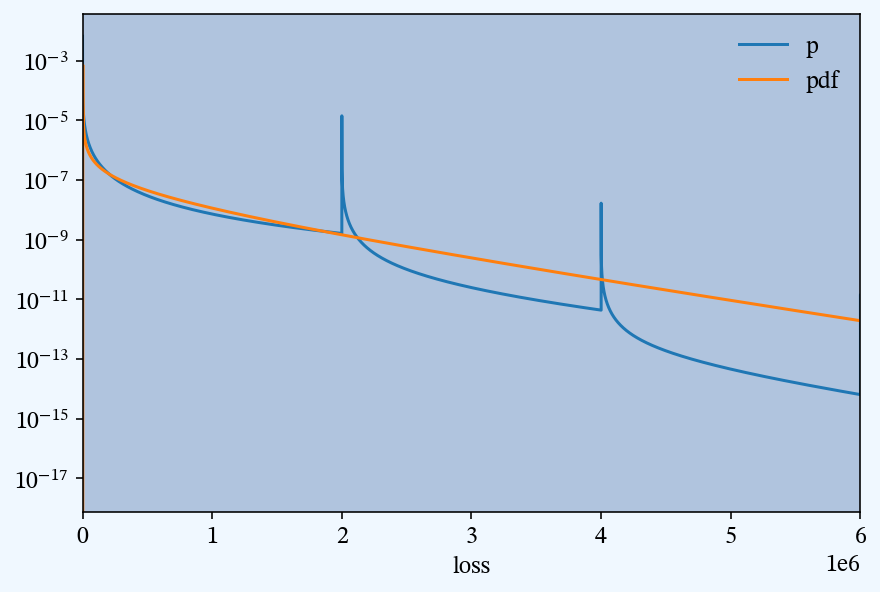

time: 750 ms (started: 2022-10-30 15:41:55 +00:00)


In [204]:
%%sf  1 1 6 4 
df[['p', 'pdf']].plot(ax=ax)
ax.set(xlim=[0, 6e6], yscale='log') # ylim=[0, 1e-5], yscale='log') #  ylim=bagg2m.limits('density'))

# df[['F', 'sg']].plot(ax=ax)
# ax.set(xlim=bagg2m.limits())

In [206]:
df.loc[3e6]

loss        3.000M
p          25.039p
F         999.986m
F_sev    1000.000m
S          14.498u
S_sev     333.067a
lev        33.998k
sg        999.851m
pdf       247.597p
Name: 3000000.0, dtype: float64

time: 0 ns (started: 2022-10-30 15:42:33 +00:00)


In [207]:
bagg2m# .reins_audit_df.T

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,28.338k,28.338k,-5.817u,4.758,4.758,6.080u,10.437
Freq,1.200,,,966.092m,,,1.070
Agg,34.006k,34.006k,-5.817u,4.450,4.450,5.794u,9.473


time: 15 ms (started: 2022-10-30 15:43:00 +00:00)
